In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [2]:
class PercolationSimulation:
    """
    A simulation of a 2D directed percolation problem. Given a 2D lattice, blocked sites
    are denoted by 0s, and open sites are denoted by 1s. During a simulation, water is
    poured into the top of the grid, and allowed to percolate to the bottom. If water
    fills a lattice site, it is marked with a 2 in the grid. Water only reaches a site
    if it reaches an open site directly above, or to the immediate left or right 
    of an open site.

    method percolate creates a random lattice, runs a percolation 
    simulation and
    
    1. returns True if the system percolates
    2. stores the original lattice in self.grid
    3. stores the water filled lattice in self.grid_filled


    Attributes:
        grid (np.array): the original lattice of blocked (0) and open (1) sites
        grid_filled (np.array): the lattice after water has been poured in
        n (int): number of rows and columns in the lattice
        p (float): probability of a site being blocked in the randomly-sampled lattice
            random_state (int): random seed for the random number generator
        random_state (int): random seed for numpy's random number generator. Used to 
            ensure reproducibility across random simulations. The default value of None
            will use the current state of the random number generator without resetting
            it.
    """

    def __init__(self, n=100, p=0.5, grid=None, random_state=None):
        """
        Initialize a PercolationSimulation object.

        Args:
            n (int): number of rows and columns in the lattice
            p (float): probability of a site being blocked in the randomly-sampled lattice
            random_state (int): random seed for numpy's random number generator. Used to
                ensure reproducibility across random simulations. The default value of None
                will use the current state of the random number generator without resetting
                it.
        """

        self.random_state = random_state # the random seed

        # Initialize a random grid if one is not provided. Otherwise, use the provided
        # grid.
        if grid is None:
            self.n = n
            self.p = p
            self.grid = np.zeros((n, n))
            self._initialize_grid()
        else:
            assert len(np.unique(np.ravel(grid))) <= 2, "Grid must only contain 0s and 1s"
            self.grid = grid.astype(int)
            # override numbers if grid is provided
            self.n = grid.shape[0]
            self.p = 1 - np.mean(grid)

        self.grid_filled = np.copy(self.grid)

    def _initialize_grid(self):
        """
        Sample a random lattice for the percolation simulation. This method should
        write new values to the self.grid and self.grid_filled attributes. Make sure
        to set the random seed inside this method.

        """
        
        np.random.seed(self.random_state) # Set the random seed
        self.grid = np.random.choice([0, 1], p = [1-self.p, self.p], size=(self.n, self.n))
        
       
    def _flow_recursive(self, i, j):
        """
        The recursive portion of the flow simulation. Notice how grid and grid_filled
        are used to keep track of the global state, even as our recursive calls nest
        deeper and deeper
        """
        if self.grid_filled[i][j] == 1:
            self.grid_filled[i][j] = 2
        
            if i < self.n-1:
                self._flow_recursive(i+1, j)
            if j > 0:
                self._flow_recursive(i, j-1)
            if j < self.n-1:
                self._flow_recursive(i, j+1)
        

    def _flow(self):
        """
        Run a percolation simulation using recursion

        This method writes to the grid and grid_filled attributes
        """
        for j in range(self.n):
            self._flow_recursive(0, j)


    def percolate(self):
        """
        Initialize a random lattice and then run a percolation simulation. Report results
        """
        self._initialize_grid()
        self._flow()
        if np.any(self.grid_filled[-1]==2):
            return True
        else:
            return False

False
False
False
True


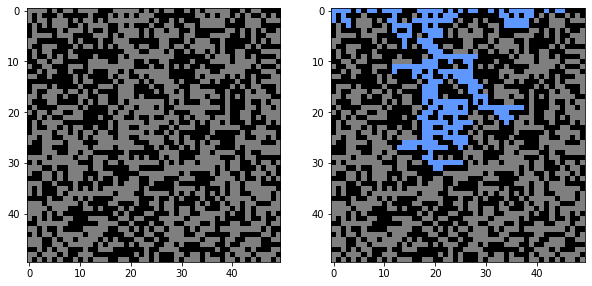

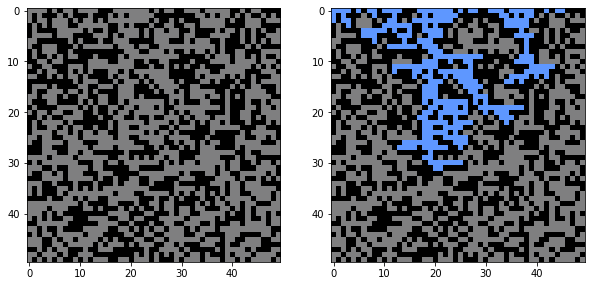

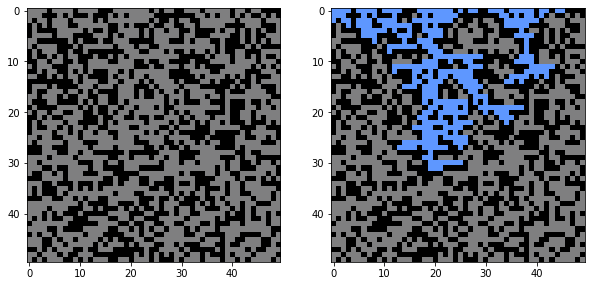

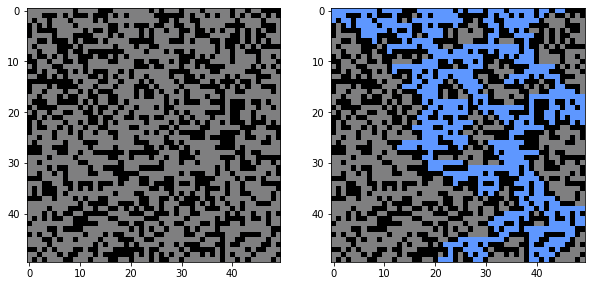

In [3]:
from matplotlib.colors import LinearSegmentedColormap
def plot_percolation(mat1, mat2):
    """
    Plots a percolation matrix, where 0 indicates a blocked site (black), 1 indicates an empty 
    site (grey), and 2 indicates a filled site (blue)
    
    I am plotting the initial grid and the filled grid side by side. This helps in verifying 
    that the code runs as intended
    """
    cvals  = [0, 1, 2]
    colors = [(0, 0, 0), (0.5, 0.5, 0.5), (0.372549, 0.596078, 1)]

    norm = plt.Normalize(min(cvals), max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    plt.subplot(1, 2, 1)
    plt.imshow(mat1, cmap=cmap, vmin=0, vmax=2)
    plt.subplot(1, 2, 2)
    plt.imshow(mat2, cmap=cmap, vmin=0, vmax=2)


model = PercolationSimulation(n=50, random_state=0, p=0.525)
print(model.percolate())
plt.figure(figsize = (10,10))
plot_percolation(model.grid, model.grid_filled)



model = PercolationSimulation(n=50, random_state=0, p=0.55)
print(model.percolate())
plt.figure(figsize = (10,10))
plot_percolation(model.grid, model.grid_filled)


model = PercolationSimulation(n=50, random_state=0, p=0.575)
print(model.percolate())
plt.figure(figsize = (10,10))
plot_percolation(model.grid,model.grid_filled)


model = PercolationSimulation(n=50, random_state=0, p=0.6)
print(model.percolate())
plt.figure(figsize = (10,10))
plot_percolation(model.grid,model.grid_filled)

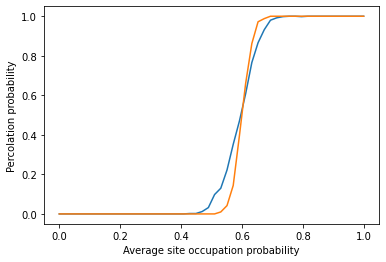

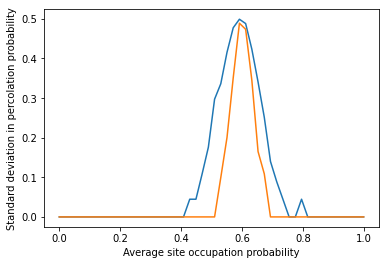

In [57]:
#copied part of code from Willaim's github

pvals = np.linspace(0, 1, 50) # control parameter for percolation phase transition
n_reps = 200 # number of times to repeat the simulation for each p value

all_percolations = list()
all_percolations2 = list()
for p in pvals:
    all_replicates = list()
    all_replicates2 = list()
    for i in range(n_reps):
        # Initialize the model
        model = PercolationSimulation(20, p=p)
        all_replicates.append(model.percolate())
        model = PercolationSimulation(50, p=p)
        all_replicates2.append(model.percolate())
    all_percolations.append(all_replicates)
    all_percolations2.append(all_replicates2)
    

plt.figure()
plt.plot(pvals, np.mean(np.array(all_percolations), axis=1))
plt.plot(pvals, np.mean(np.array(all_percolations2), axis=1))
plt.xlabel('Average site occupation probability')
plt.ylabel('Percolation probability')

plt.figure()
plt.plot(pvals, np.std(np.array(all_percolations), axis=1))
plt.plot(pvals, np.std(np.array(all_percolations2), axis=1))
plt.xlabel('Average site occupation probability')
plt.ylabel('Standard deviation in percolation probability')

plt.show()

Checklist from To-Do posted by William 

1. My code is recursive, I have not attempted the non-recursive version
<br />

2. Plotted above. The variance having a sharp peak around $p = p_c (~0.6)$, suggests that this is a phase-transition, analogous to the Ising model. 
<br />

3. At the critical value of p, we expect one big cluster connecting all the occupied sites, i.e., 


$N_{sites} = N_{bonds}$


Probability for a site to be open = $p$

Probability that the filled site is connected to atleast one neighbouring open site = $p\times(1- (1-p)^4) \approx 4p^2$

Bonds are doubly counted doing this $\implies N_{bonds} \approx 2p^2N, N_{sites} = pN$

This gives us $p_c = 0.5$

4. Theoretically, I am only using two arrays grid and grid_filled to simulate the percolation. S, the memory usage scales as $\mathcal{O}(N)$, where N is the total number of sites.

In the worst case scenario, starting from the top most row, the algorithm terminates after $\mathcal{O}(\sqrt{N})$ steps and it scans over all the sites in the top row. So, the runtime must scale as $\mathcal{O}(N)$

    

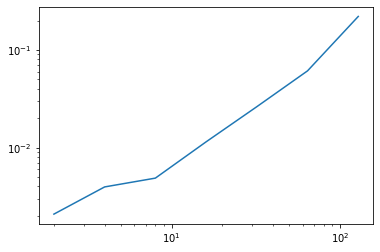

In [6]:
import timeit

n_vals = 2**np.arange(1, 8)

all_times = []
for n in n_vals:
    time = timeit.timeit("PercolationSimulation(n=n).percolate()", globals=globals(), number=n)
    all_times.append(time)
all_times = np.array(all_times)

plt.figure()
plt.loglog(n_vals, all_times)
